# <span style="color:turquoise">Performance Assessment | D207 Exploratory Data Analysis
&emsp;Ryan L. Buchanan
<br>&emsp;Student ID:  001826691
<br>&emsp;Masters Data Analytics (12/01/2020)
<br>&emsp;Program Mentor:  Dan Estes
<br>&emsp;(385) 432-9281 (MST)
<br>&emsp;rbuch49@wgu.edu
</span>

### A. Describe a real-world organizational situation or issue in the Data Dictionary
1.  Provide one question that is relevant to your chosen data set. You will answer this question later in the task through an analysis of the cleaned data, using one of the following techniques: chi-square, t-test, or analysis of variance (ANOVA).

2.  Explain how stakeholders in the organization could benefit from an analysis of the data.

3.  Identify all of the data in your data set that are relevant to answering your question in part A1.

### <span style="color:green"><b>A1. Question for Analysis</b>:</span>
Which customers are at high risk of churn?  And, which customer features/variables are most significant to churn?

### <span style="color:green"><b>A2. Benefit from Analysis</b>:</span>
Stakeholders in the company will benefit by knowing, with some measure of confidence, which customers are at highest risk of churn because this will provide weight for decisions in marketing improved services to customers with these characteristics and past user experiences.

### <span style="color:green"><b>A3. Data Identification</b>:</span>
Most relevant to our decision making process is the dependent variable of "Churn" which is binary categorical with only two values, "Yes" or "No".  In cleaning the data, we discovered relevance of the continuous numerical data columns "Tenure" (the number of months the customer has stayed with the provider), "MonthlyCharge" (the average monthly charge to the customer) & "Bandwidth_GB_Year" (the average yearly amount of data used, in GB, per customer).  Finally, the discrete numerical data from the survey responses from customers regarding various customer service features is relevant in the decision-making process.  In the surveys, customers provided ordinal numerical data by rating 8 customer service factors ("timely response", "timely fixes", "timely replacements", "reliability", "options", "respectful response", "courteous exchange" & "evidence of active listening") on a scale of 1 to 8 (1 = most important, 8 = least important).

### B. Describe the data analysis

1.  Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:

&emsp;&emsp;•   chi-square

&emsp;&emsp;•   t-test

&emsp;&emsp;•   ANOVA

2.  Provide the output and the results of any calculations from the analysis you performed.

3.  Justify why you chose this analysis technique.

### <span style="color:green"><b>B. Data Analysis</b>:</span>
1.  Chi-square testing will be used. 
<br>2.
<br>3.  As chi-square is the only non-parametric test . . . A Goodness of Fit test was used because that's what Hadelin & Kirill used <i style="color:red">look up their description & use their verbiage<i>

### <span style="color:green"><b>B1. Code</b>:</span>


### Standard imports

In [1]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import pylab
import statsmodels.api as sm
import statistics
from scipy import stats

### Load data set into Pandas dataframe

In [2]:
df = pd.read_csv('Data/churn_clean.csv')

### <span style="color:green"><b>B2. Output</b>:</span>


### <span style="color:green"><b>B3. Justification</b>:</span>


### C. Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

1. Represent your findings in Part C, visually as part of your submission.
 

Note: To draw a graph or visualization, you may use one or a combination of the following:

- A spreadsheet program, such as Excel (*.xls)

- A graphics program, such as Paint (*.jpeg, *.gif)

- A word-processing program, such as Word (*.rtf) 

- A scanned hand-drawn graph (*.jpeg, *.gif)

### <span style="color:green"><b>C. Univariate Statistics</b>:</span>


Two continuous variables:  
    1. MonthlyCharge
    2. Bandwidth_GB_Year
Two categorical (ordinal) variables:
    1. Item1 (Timely response) - relabeled "TimelyResponse"
    2. Item7 (Courteous exchange) - relabeled "Courteous" 

In [3]:
# Rename last 8 survey columns for better description of variables
df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'Fixes', 
                     'Item3':'Replacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'Respectfulness', 
                     'Item7':'Courteous', 
                     'Item8':'Listening'}, 
          inplace=True)

In [4]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


### <span style="color:green"><b>C1. Visual of Findings</b>:</span>


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


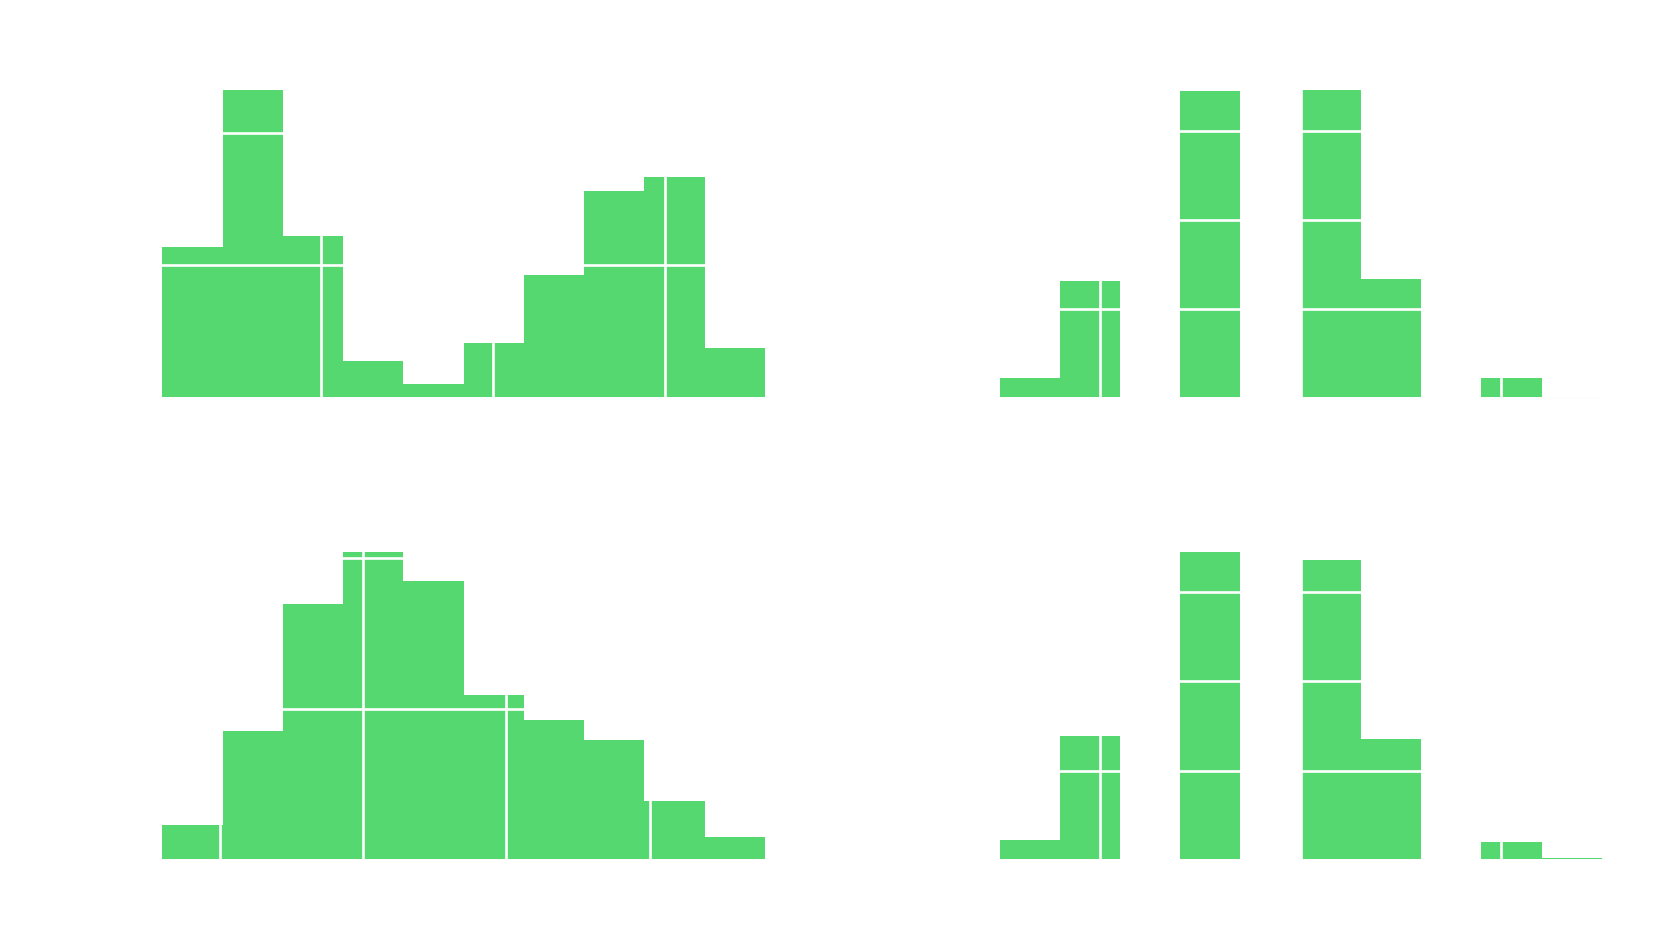

In [5]:
# Create histograms of contiuous & categorical variables
df[['MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'Courteous']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

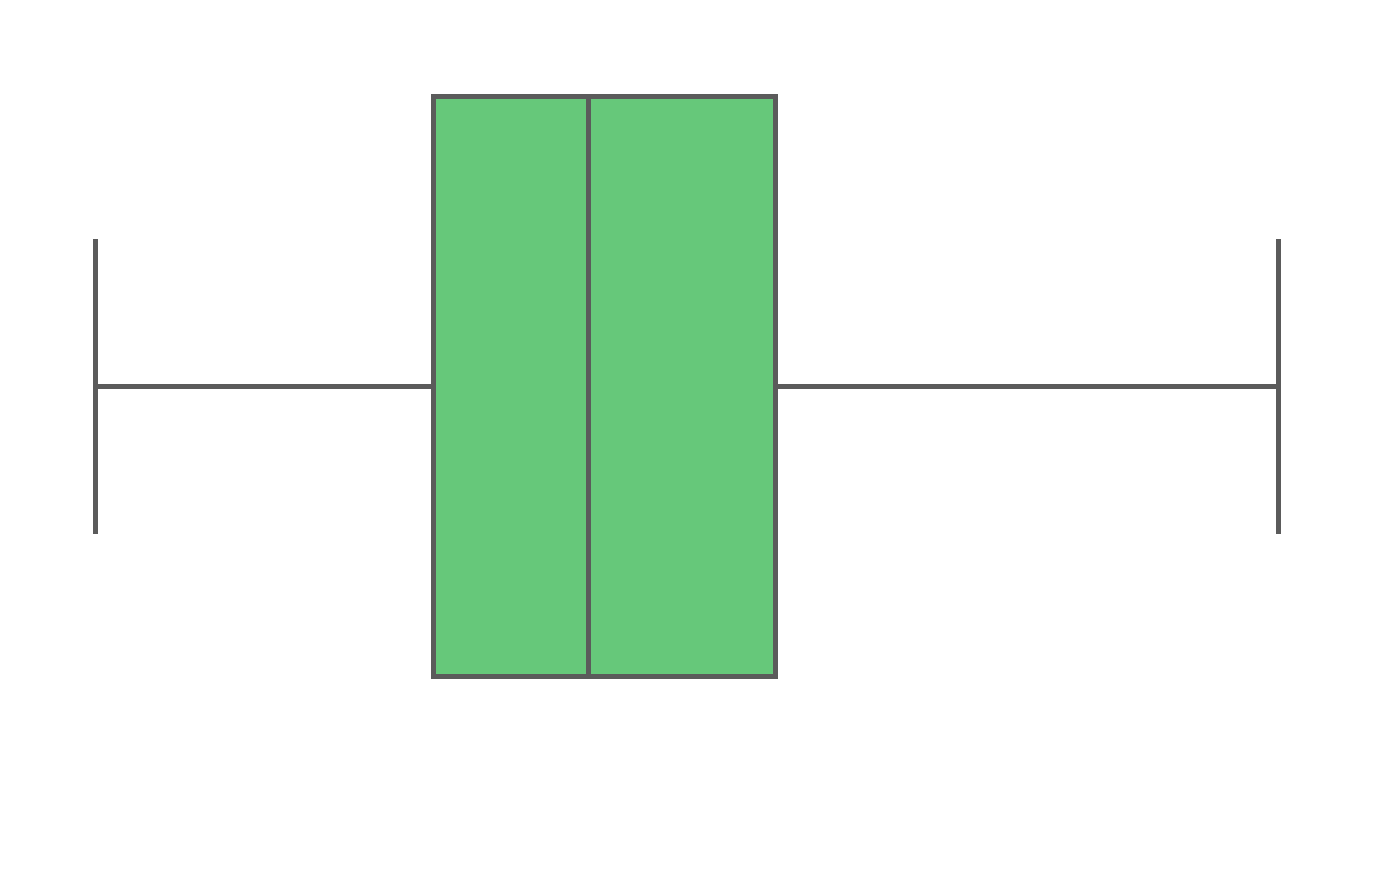

In [6]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('MonthlyCharge', data = df)
plt.show()

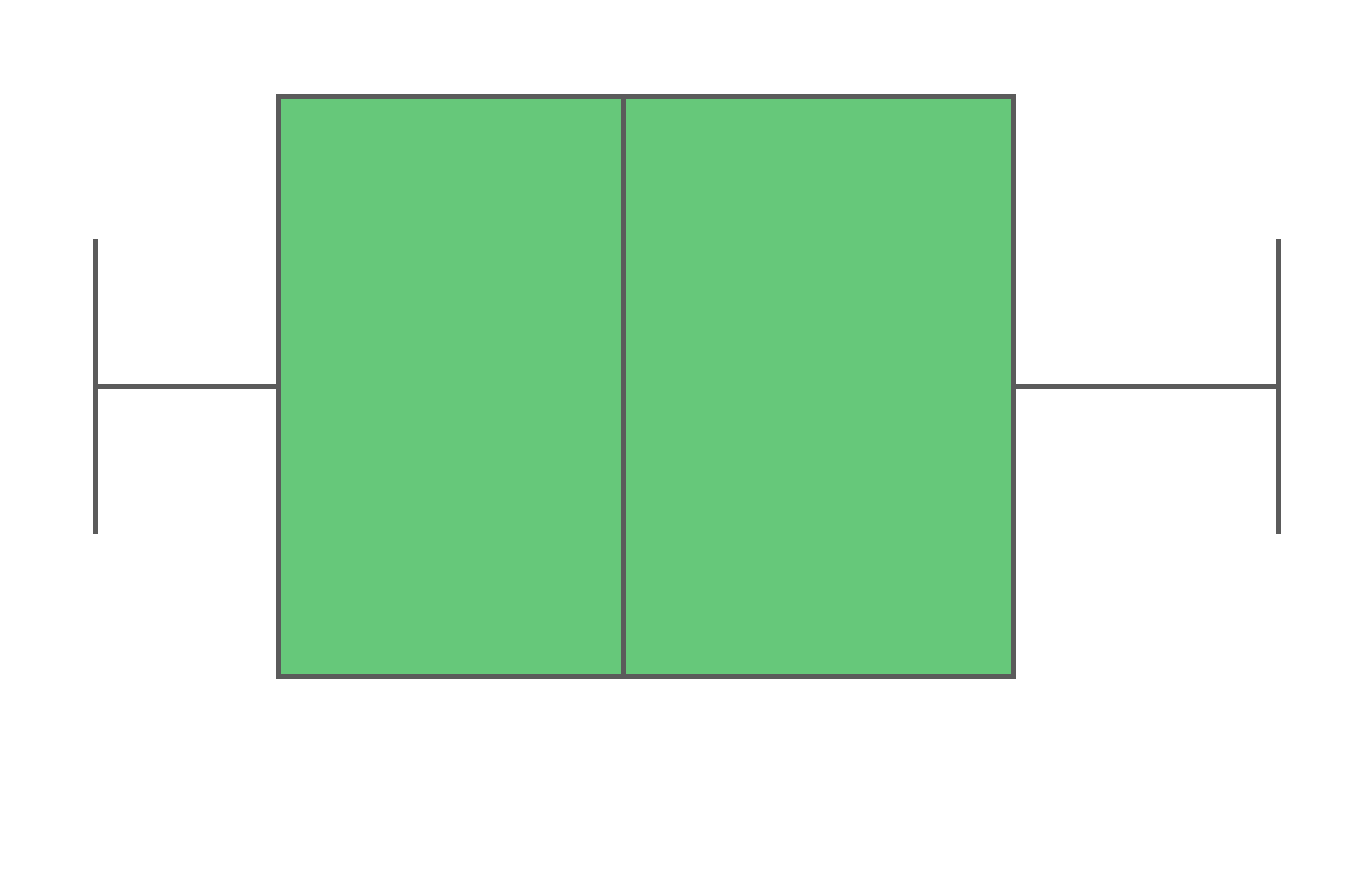

In [7]:
sns.boxplot('Bandwidth_GB_Year', data = df)
plt.show()

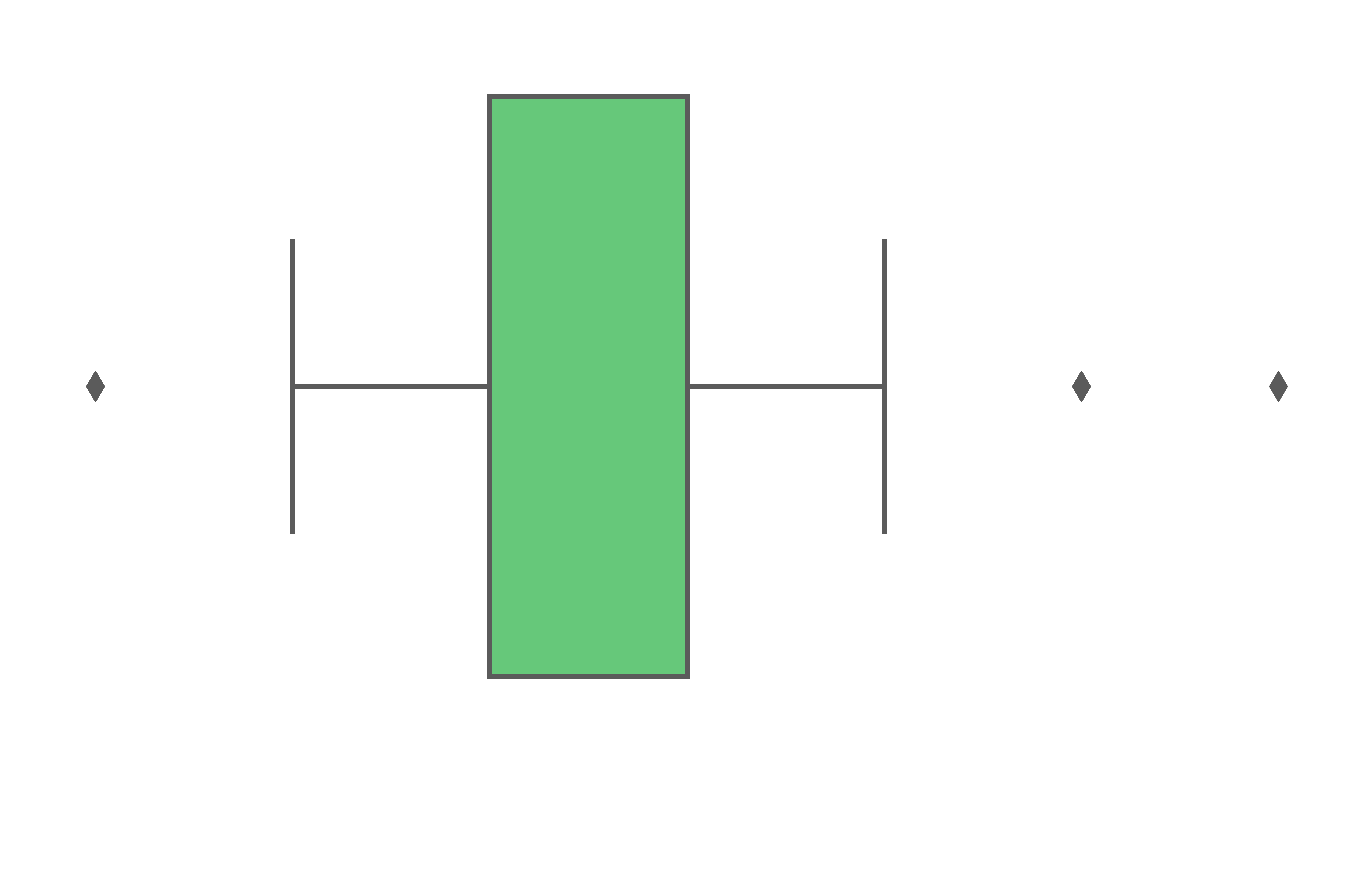

In [8]:
sns.boxplot('TimelyResponse', data = df)
plt.show()

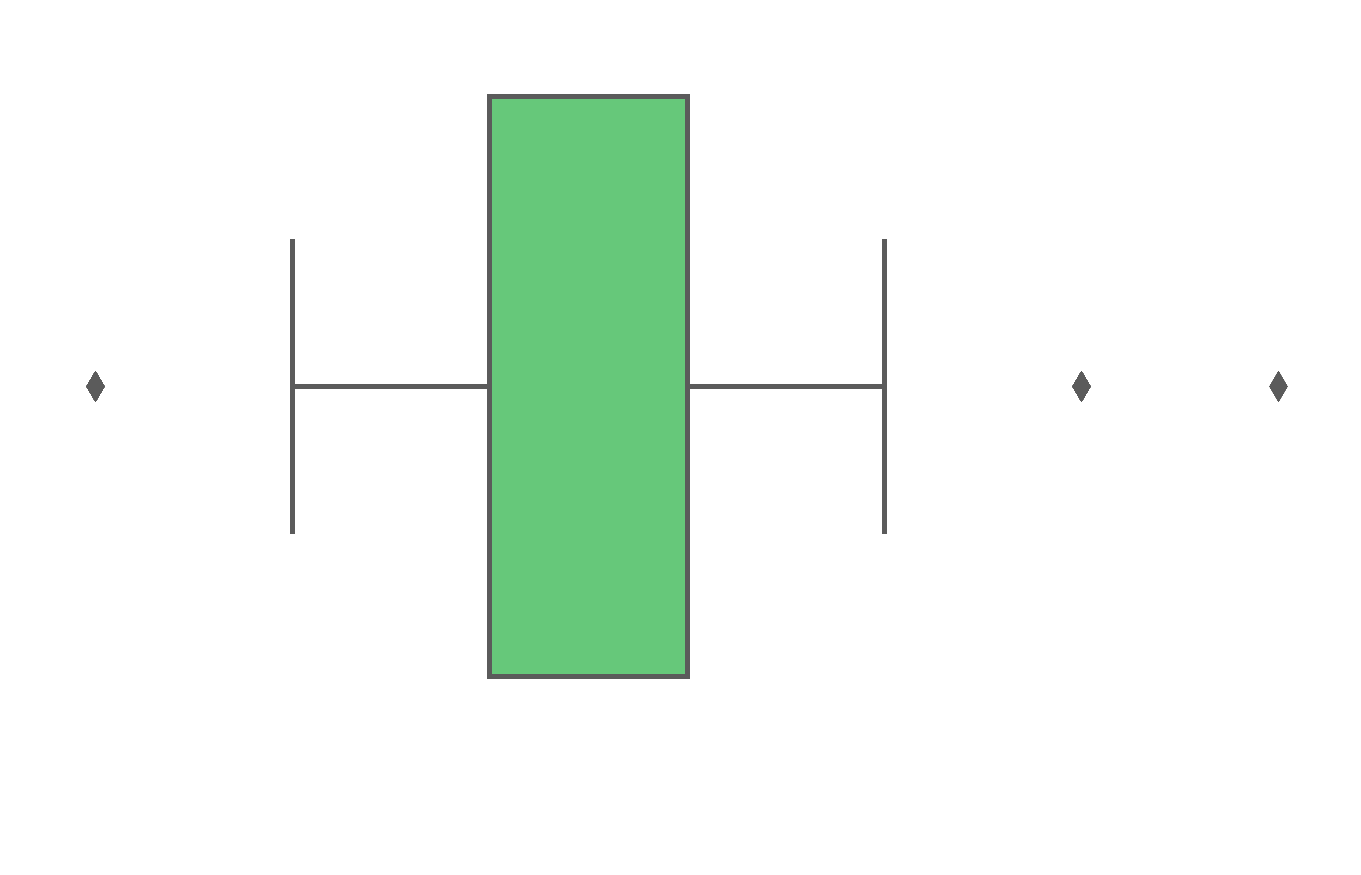

In [9]:
sns.boxplot('Courteous', data = df)
plt.show()

### D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

Represent your findings in Part D, visually as part of your submission.
 

Note: To draw a graph or visualization, you may use one or a combination of the following:

- A spreadsheet program, such as Excel (*.xls)

- A graphics program, such as Paint (*.jpeg, *.gif)

- A word-processing program, such as Word (*.rtf) 

- A scanned hand-drawn graph (*.jpeg, *.gif)

### <span style="color:green"><b>D. Bivariate Statistics</b></span>


Two continuous variables:  
    1. MonthlyCharge
    2. Bandwidth_GB_Year
Two categorical (binomial & ordinal, respectively) variables:
    1. Churn
    2. Item7 (Courteous exchange) - relabeled "Courteous" 

### <span style="color:green"><b>D1. Visual of Findings</b>:</span>


In [10]:
# Create dataframe for heatmap bivariate analysis of correlation
churn_bivariate = df[['MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'Courteous']]

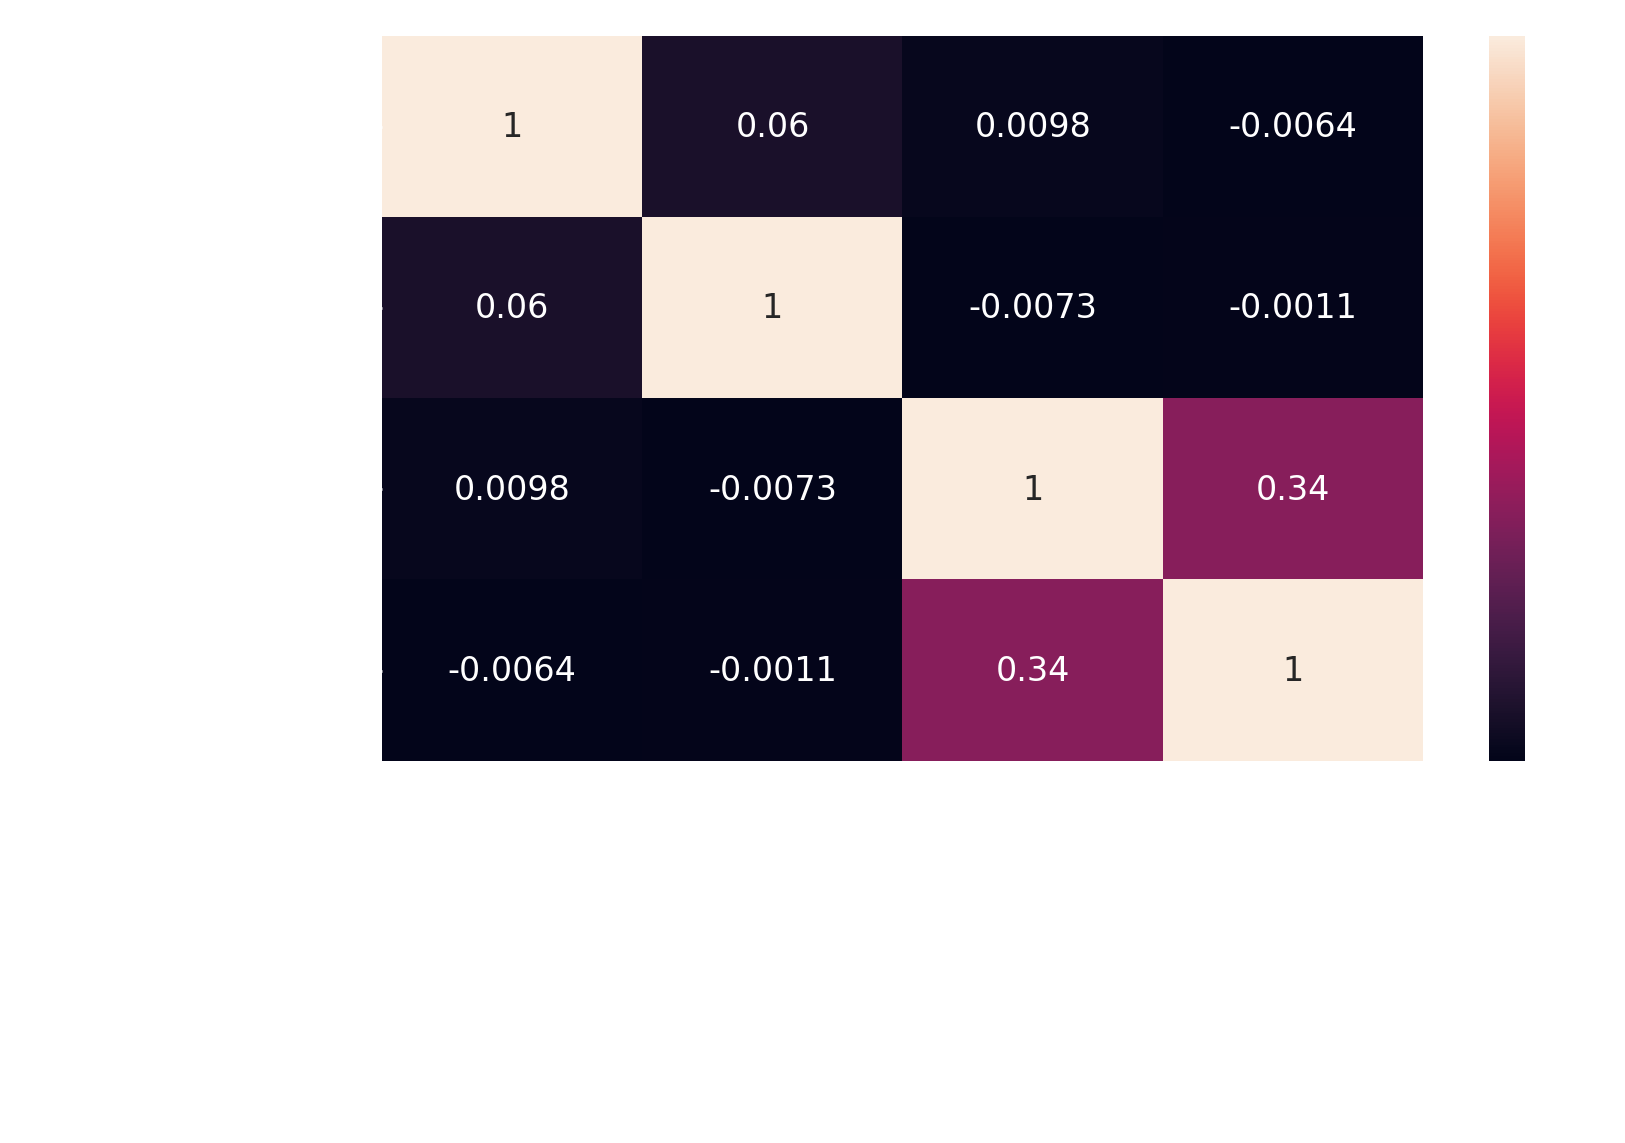

In [11]:
sns.heatmap(churn_bivariate.corr(), annot=True)
plt.show()

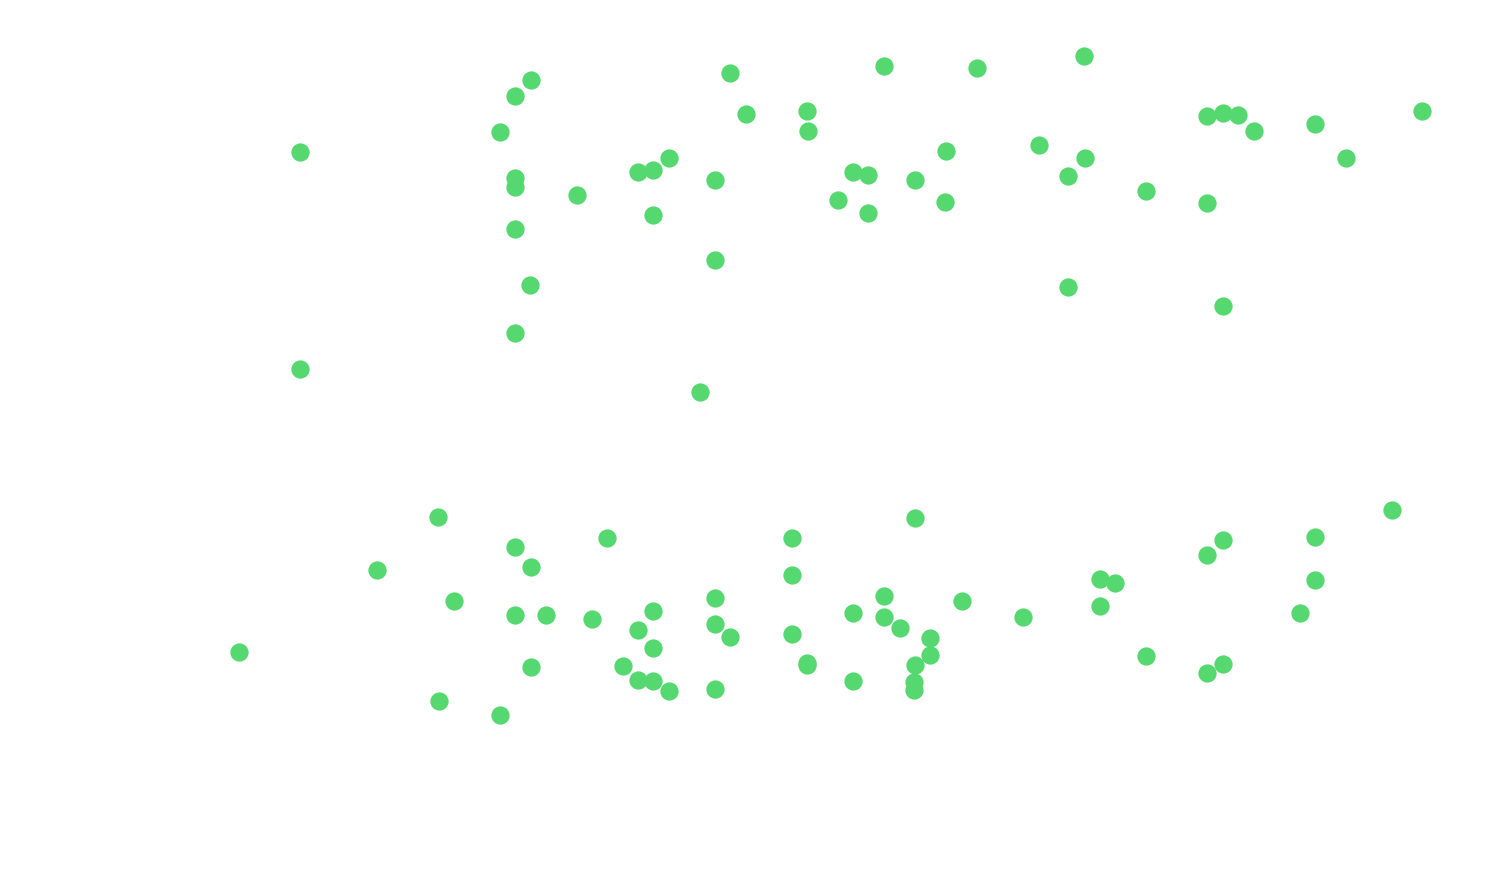

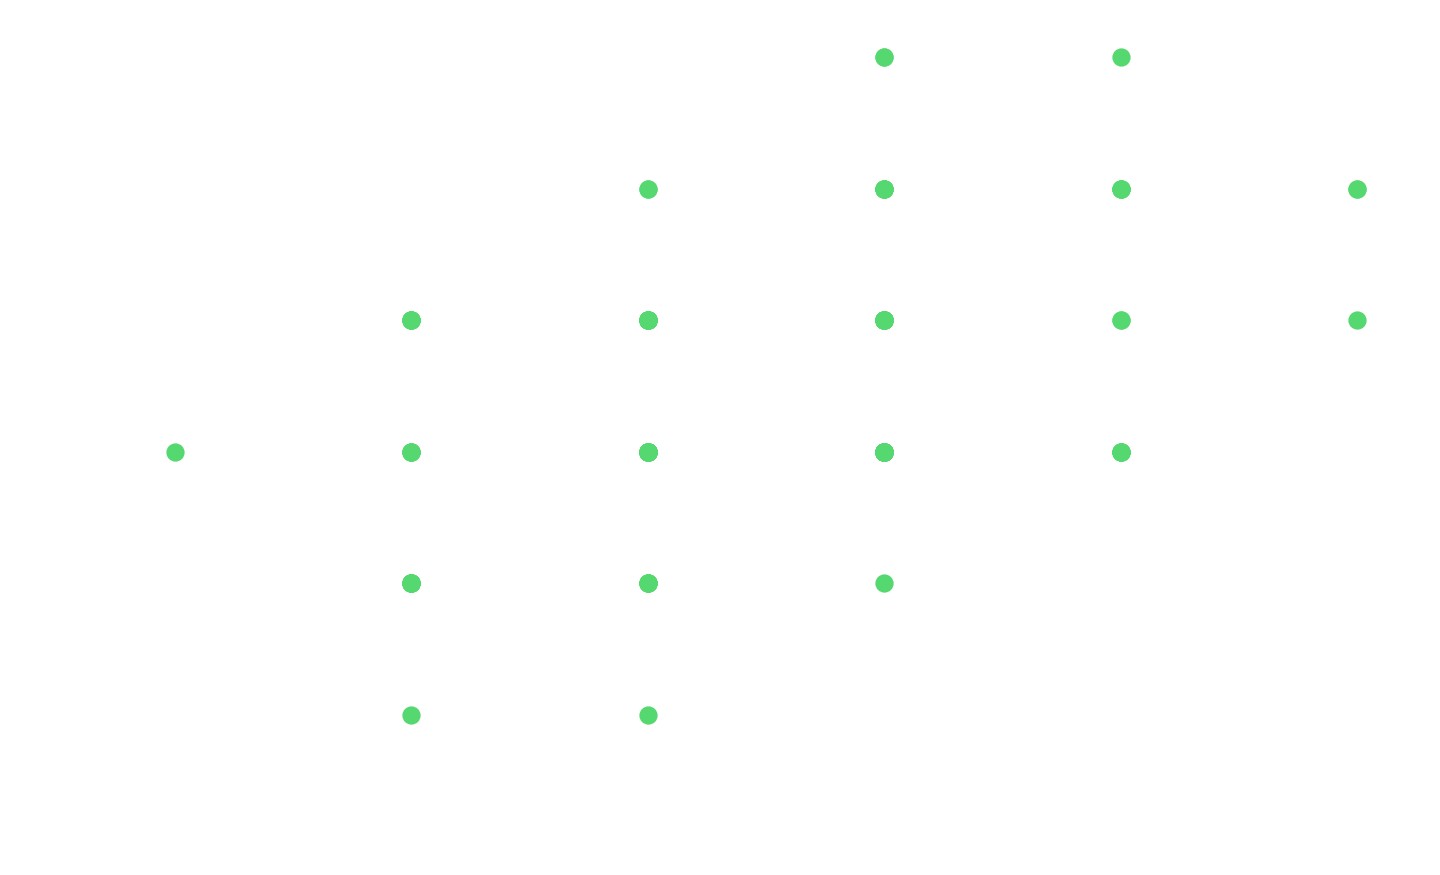

In [14]:
# Create a scatter plot of continuous variables MonthlyCharge & Bandwidth_GB_Year
churn_bivariate[churn_bivariate['MonthlyCharge'] < 300].sample(100).plot.scatter(x='MonthlyCharge', 
                                                                                 y='Bandwidth_GB_Year')

# Create a scatter plot of categorical variables TimelyResponse & Courteous
churn_bivariate[churn_bivariate['TimelyResponse'] < 7].sample(100).plot.scatter(x='TimelyResponse', 
                                                                                 y='Courteous')

### E. Summarize the implications of your data analysis 

1.  Discuss the results of the hypothesis test.

2.  Discuss the limitations of your data analysis.

3.  Recommend a course of action based on your results.

### <span style="color:green"><b>E1. Results of Analysis</b></span>

### <span style="color:green"><b>E2. Limitations of Analysis</b>:</span>


### <span style="color:green"><b>E3. Recommended Course of Action</b>:</span>
The tests suggest the variables involved in timely action with regard to customer satisfaction (TimelyResponses, Fixes, Replacements & Respectfulness) should be given greater emphasis and hopefully help reduce the churn rate from the large number of 27% & "increase the retention period of customers" by targeting more resources in the direction prompt customer service (Ahmad, 2019, p. 1). Again, this seems an intuitive result but now decision-makers in the company of reasonable verification of what might have been a "hunch".

### F.   Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the tool(s) used. 

 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.

 

To submit your recording, upload it to the Panopto drop box titled “Exploratory Data Analysis – OEM2 \ D207.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option. 

### <span style="color:green"><b>F. Video</b></span>
<span style="color:red">Link here</span>

### <span style="color:green">G. Sources for Third-Party Code</span>

Kaggle. (2018, May 01). Bivariate plotting with pandas. Kaggle. https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas#

Sree. &ensp; (2020, October 26). &ensp; <i>Predict Customer Churn in Python.</i> &ensp; Towards Data Science.  <br>&emsp;https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

Wikipedia. (2021, May 31). Bivariate Analysis. https://en.wikipedia.org/wiki/Bivariate_analysis#:~:text=Bivariate%20analysis%20is%20one%20of,the%20empirical%20relationship%20between%20them.&text=Like%20univariate%20analysis%2C%20bivariate%20analysis%20can%20be%20descriptive%20or%20inferential.

### <span style="color:green">H. Sources</span>

Ahmad, A. K., Jafar, A & Aljoumaa, K. &ensp; (2019, March 20). &ensp; <i>Customer churn prediction in telecom using machine <br>&emsp;learning in big data platform</i>. &ensp; Journal of Big Data.  <br>&emsp;https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0191-6

Altexsoft. &ensp; (2019, March 27). &ensp; <i>Customer Churn Prediction Using Machine Learning: Main Approaches and Models</i>.  <br>&emsp;Altexsoft.  <br>&emsp;https://www.altexsoft.com/blog/business/customer-churn-prediction-for-subscription-businesses-using-machine-learning-main-approaches-and-models/


Bruce, P., Bruce A. & Gedeck P. (2020). Practical Statistics for Data Scientists. O'Reilly.

Freedman, D. Pisani, R. & Purves, R. (2018). Statistics. W. W. Norton & Company, Inc. 

Frohbose, F. &ensp; (2020, November 24). &ensp; <i>Machine Learning Case Study: Telco Customer Churn Prediction</i>.  <br>&emsp;Towards Data Science.  <br>&emsp;https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d

Griffiths, D. (2009). A Brain-Friendly Guide: Head First Statistics. O'Reilly.

### <span style="color:green">I. Professional Communication</span>

In [12]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('D207_Performance_Assessment.ipynb')

'wget' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'colab_pdf'